In [5]:
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from myConvexHull.process import Convex
from scipy.spatial import ConvexHull

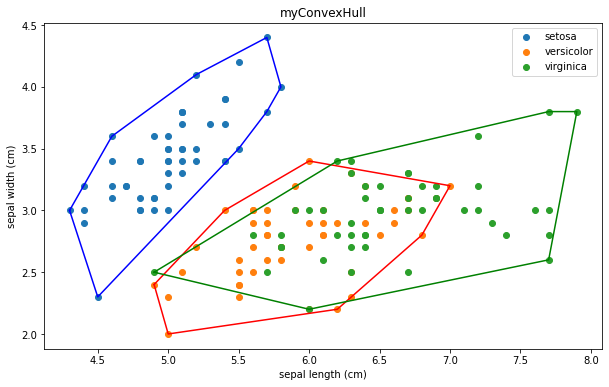

In [9]:
plt.figure(figsize = (10, 6))
plt.title('myConvexHull')
data = datasets.load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['Target'] = pd.DataFrame(data.target)

plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])

ConvexObj = Convex()
colors = ['b', 'r', 'g']
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i].iloc[:, [0, 1]].values
    hull = ConvexObj.ConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    plt.plot(hull[0], hull[1], color = colors[i % len(colors)])
plt.legend()

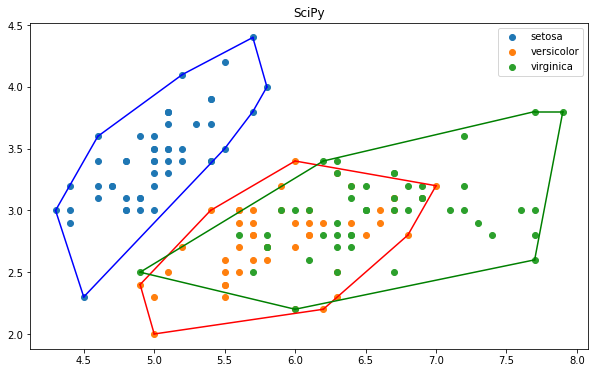

In [13]:
plt.figure(figsize = (10, 6))
plt.title('SciPy')
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i].iloc[:, [0, 1]].values
    hull = ConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull.simplices:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i % len(colors)])
plt.legend()